# Imported lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from PIL import Image
import os
os.chdir('D:/Project 4')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Store data 


In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'D:\\Project 4'

Preprocessing the image


In [4]:
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


Converting the list into numpy array


In [7]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


Save the data and labels for future use

In [8]:
try:
    os.mkdir('Training')
except:
    print("all ready folder is present")
finally:
    np.save('./Training/data',data)
    np.save('./Training/labels',labels)
    print("data save successfully")

all ready folder is present
data save successfully


Load the data and labels

In [9]:
data = np.load('./Training/data.npy')
labels = np.load('./Training/labels.npy')

In [10]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


Splitting training and testing dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Converting the labels into one hot encoding

In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


Building the model

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


Compilation of the model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# epochs = 15  #more the number more the accuracy
epochs = 30 
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
981/981 [==============================] - 59s 60ms/step - loss: 0.6173 - accuracy: 0.8148 - val_loss: 0.2488 - val_accuracy: 0.9397
Epoch 2/30
981/981 [==============================] - 60s 61ms/step - loss: 0.4932 - accuracy: 0.8535 - val_loss: 0.1867 - val_accuracy: 0.9501
Epoch 3/30
981/981 [==============================] - 60s 61ms/step - loss: 0.4140 - accuracy: 0.8775 - val_loss: 0.1637 - val_accuracy: 0.9527
Epoch 4/30
981/981 [==============================] - 61s 62ms/step - loss: 0.4165 - accuracy: 0.8775 - val_loss: 0.1634 - val_accuracy: 0.9501
Epoch 5/30
981/981 [==============================] - 62s 63ms/step - loss: 0.3598 - accuracy: 0.8929 - val_loss: 0.1318 - val_accuracy: 0.9630
Epoch 6/30
981/981 [==============================] - 62s 63ms/step - loss: 0.3450 - accuracy: 0.8983 - val_loss: 0.0997 - val_accuracy: 0.9719
Epoch 7/30
981/981 [==============================] - 62s 63ms/step - loss: 0.3180 - accuracy: 0.9053 - val_loss: 0.0883 - val_accuracy:

Saving the model data'

In [16]:
model.save("./Training/my_model2.h5")

C:\Users\himan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Plotting graphs for accuracy 

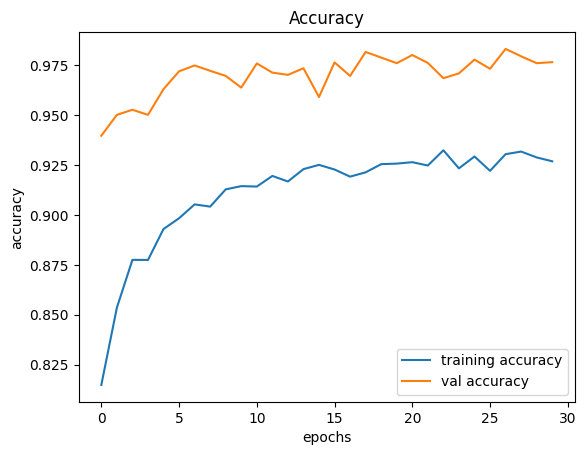

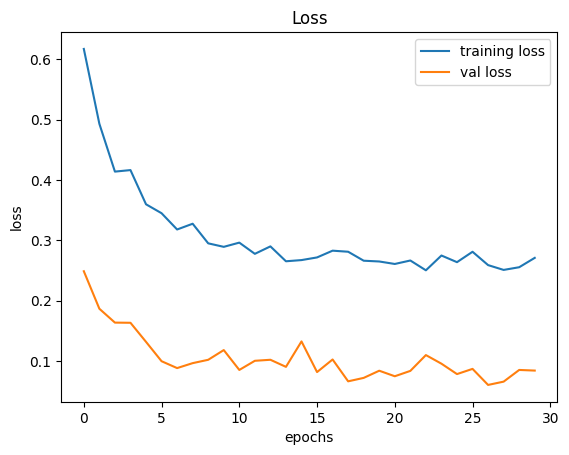

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Testing on test data


In [18]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    labels = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,labels

In [19]:
X_test, labels = testing('Test.csv')

In [20]:
Y_pred = model.predict(X_test)
Y_pred

395/395 [==============================] - 4s 10ms/step


array([[1.01597501e-25, 3.24107510e-19, 1.31683376e-23, ...,
        1.22180199e-19, 4.05480311e-23, 1.40421343e-23],
       [2.21550422e-09, 1.00000000e+00, 3.36660191e-14, ...,
        2.41430310e-26, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.87138208e-10, 2.48879569e-05, 5.18219567e-05, ...,
        2.48424953e-07, 3.27745397e-06, 1.38625488e-04],
       [1.70580172e-08, 1.32146257e-03, 9.55711730e-05, ...,
        9.34656327e-06, 2.25196351e-15, 6.38586684e-10],
       [8.96029992e-15, 2.41733994e-10, 7.50119966e-07, ...,
        1.43564027e-09, 2.07912479e-10, 7.35913327e-12]], dtype=float32)

In [21]:
Y_pred = np.argmax(model.predict(X_test),axis=1)
Y_pred


395/395 [==============================] - 4s 10ms/step


array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

Accuracy with test data

In [23]:
print(accuracy_score(labels,Y_pred))

0.9380839271575614


Saving the model 

In [24]:
model.save("./Training/Tsr.h5")

C:\Users\himan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading the model


In [5]:
os.chdir(r'D:/Project 3')
model = load_model('./Training/Tsr.h5')

Classes of traffic signs

In [6]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

Function for testing image 

In [7]:
def test_on_image(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    return image, Y_pred

1/1 [==============================] - 0s 33ms/step
Prediction traffic sign is  Roundabout mandatory


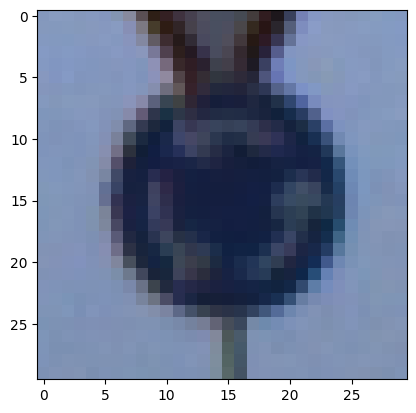

In [14]:
plot, prediction = test_on_image(r'D:/Project 3/Test/00355.png')
s = [str(i) for i in prediction]
a = int("".join(s))+1
print("Prediction traffic sign is ",classes[a])
plt.imshow(plot)
plt.show()